# All-in-one: Multi-layer Neural Network

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Total batch: 550
Epoch:  0, Train Error: 812.29523, Validation Error: 808.12689, Test Accuracy: 0.07790
Epoch:  1, Train Error: 1.79483, Validation Error: 1.84282, Test Accuracy: 0.50580
Epoch:  2, Train Error: 1.25159, Validation Error: 1.29967, Test Accuracy: 0.59770
Epoch:  3, Train Error: 1.05341, Validation Error: 1.12201, Test Accuracy: 0.65020
Epoch:  4, Train Error: 0.94076, Validation Error: 1.02594, Test Accuracy: 0.71630
Epoch:  5, Train Error: 0.82792, Validation Error: 0.89349, Test Accuracy: 0.74610
Epoch:  6, Train Error: 0.79810, Validation Error: 0.86793, Test Accuracy: 0.75910
Epoch:  7, Train Error: 0.84932, Validation Error: 0.91554, Test Accuracy: 0.75460
Epoch:  8, Train Error: 0.66226, Validation Error: 0.73082, Test Accuracy: 0.81400
Epoch:  9, Train Error: 0.61916, Valid

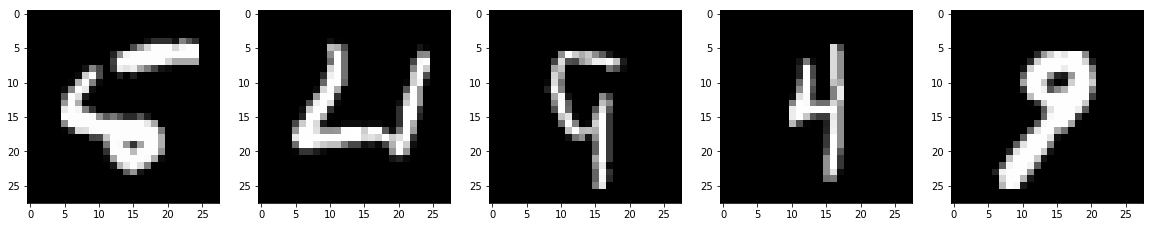

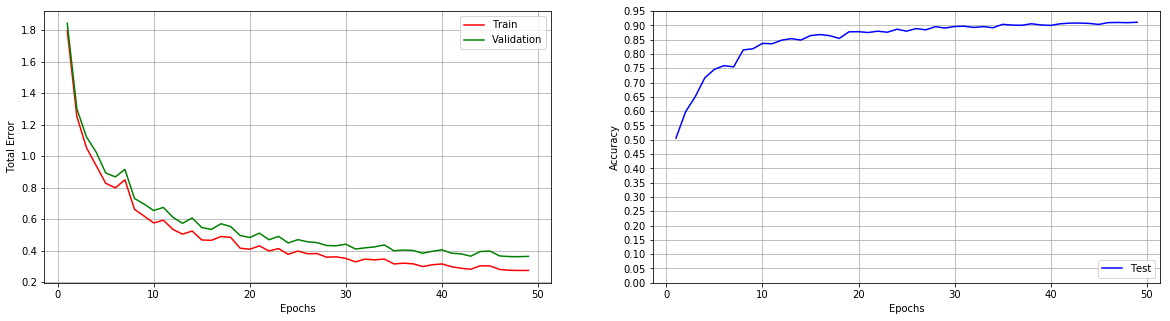

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
Number of False Prediction: 911
False Prediction Index: 8, Prediction: 2, Ground Truth: 5
False Prediction Index: 33, Prediction: 6, Ground Truth: 4
False Prediction Index: 38, Prediction: 3, Ground Truth: 2
False Prediction Index: 61, Prediction: 2, Ground Truth: 8
False Prediction Index: 62, Prediction: 4, Ground Truth: 9


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math
import tensorflow as tf

mnist = input_data.read_data_sets("../MNIST_data/", one_hot=True)

batch_size = 100
training_epochs = 100
learning_rate = 0.05

epoch_list = []
train_error_list = []
validation_error_list = []
test_accuracy_list = []
diff_index_list = []

# Network Parameters
n_input = 784 # MNIST data input (img shape: 28*28)
n_hidden_1 = 128 # 1st layer number of features
n_hidden_2 = 128 # 2nd layer number of features
n_classes = 10 # MNIST total classes (0-9 digits)
    
# Data Preparation
x = tf.placeholder(tf.float32, [None, n_input])
y_target = tf.placeholder(tf.float32, [None, n_classes])

# Model Construction
# Store layers weight & bias
weights = {
    'W1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'W2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# 1st Hidden layer with RELU activation
u2 = tf.matmul(x, weights['W1']) + biases['b1']
z2 = tf.nn.relu(u2)

# 2ndHidden layer with RELU activation
u3 = tf.matmul(z2, weights['W2']) + biases['b2']
z3 = tf.nn.relu(u3)

# Output layer with linear activation
u_out = tf.matmul(z3, weights['out']) + biases['out']

# Target Setup
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u_out, labels=y_target))
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)

# Accuracy   
prediction_and_ground_truth = tf.equal(tf.argmax(u_out, 1), tf.argmax(y_target, 1))
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32))

def draw_error_values_and_accuracy():
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction():
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(mnist.test.images[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')
    
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    total_batch = int(math.ceil(mnist.train.num_examples/float(batch_size)))
    print("Total batch: %d" % total_batch)    

    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: mnist.train.images, y_target: mnist.train.labels})
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels})
        test_accuracy_list.append(test_accuracy_value) 
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy()
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u_out, 1), feed_dict={x:mnist.test.images})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:mnist.test.labels})

    print(prediction)
    print(ground_truth)

    for i in range(mnist.test.num_examples):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction()